#导入数据集

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
f = open('data 1.csv',encoding='UTF-8')
names = ['starttime','speed','volume','occupancy']
# filename=input("文件名：")
# f=open(filename,encoding='UTF-8')
# names=['作业日期','ηCO','ηH2','TF(℃)','TC(℃)','mass','送风流量']
data=read_csv(f,names=names,header=1)
print(data)

                starttime       speed      volume   occupancy
0     2009-01-01T00:05:00   57.370000   19.000000    1.540000
1     2009-01-01T00:10:00  129.052368         NaN    1.470000
2     2009-01-01T00:15:00         NaN   30.000000         NaN
3     2009-01-01T00:20:00   55.340000   35.000000    9.122927
4     2009-01-01T00:25:00         NaN   74.680587    2.730000
5     2009-01-01T00:30:00         NaN         NaN         NaN
6     2009-01-01T00:35:00   57.560000         NaN         NaN
7     2009-01-01T00:40:00  121.740294   36.000000    2.870000
8     2009-01-01T00:45:00         NaN   82.523519         NaN
9     2009-01-01T00:50:00   57.340000   38.000000    3.130000
10    2009-01-01T00:55:00   56.460000         NaN    3.130000
11    2009-01-01T01:00:00         NaN         NaN    2.400000
12    2009-01-01T01:05:00         NaN   68.085702         NaN
13    2009-01-01T01:10:00         NaN         NaN         NaN
14    2009-01-01T01:15:00   56.090000   33.000000    3.470000
15    20

#先处理重复数据

In [77]:
print (data.isnull().any())   # 这是按照列统计的空值

print("***********************************************")
print (data[data.isnull().values==True]) #查看哪些值是空值
 
# 这里涉及到对空值的处理：删除还是替换然后还有填充（这里删除分为有一个空值删除还是有两个空值删除一行。替换可以用特定值替换或者是用平均值替换）
# tt.fillna(0,inplace=True)  # 根据本例的特点，空值可以填充0

print("***********************************************")

print(data.starttime.duplicated())

starttime    False
speed         True
volume        True
occupancy     True
dtype: bool
***********************************************
                starttime       speed      volume   occupancy
1     2009-01-01T00:10:00  129.052368         NaN    1.470000
2     2009-01-01T00:15:00         NaN   30.000000         NaN
2     2009-01-01T00:15:00         NaN   30.000000         NaN
4     2009-01-01T00:25:00         NaN   74.680587    2.730000
5     2009-01-01T00:30:00         NaN         NaN         NaN
5     2009-01-01T00:30:00         NaN         NaN         NaN
5     2009-01-01T00:30:00         NaN         NaN         NaN
6     2009-01-01T00:35:00   57.560000         NaN         NaN
6     2009-01-01T00:35:00   57.560000         NaN         NaN
8     2009-01-01T00:45:00         NaN   82.523519         NaN
8     2009-01-01T00:45:00         NaN   82.523519         NaN
10    2009-01-01T00:55:00   56.460000         NaN    3.130000
11    2009-01-01T01:00:00         NaN         NaN    2.400

In [78]:
data.starttime.drop_duplicates(keep=False,inplace=True)
#  把重复的值全部删除
print(data[data.duplicated(keep=False)])
# 检验。现在没有重复值


Empty DataFrame
Columns: [starttime, speed, volume, occupancy]
Index: []


## 现在处理缺省值


In [51]:
#https://blog.csdn.net/lwgkzl/article/details/80948548
for tup in data.itertuples():
#     print(tup[0],'-->',tup[1::],type(tup[1:]))
    if data.speed[tup] == nan:
        if tup == 1 :  #先给第一个缺省值赋值
            tmpcount = 0
            while data.speed[tup+tmpcount] == nan :
                tmpcount+=1
            data.speed[tup] = data.speed[tup+tmpcount]
        elif tup >2 and tup <= data.shape[0]: #或者使用 len(data)
            tmpcount = 0
            while data.speed[tup+tmpcount] == nan :
                tmpcount+=1
            data.speed[tup] = (data.speed[tup-1]+data.speed[tup+tmpcount])/2
        elif tup == data.shape[0]+1:
            data.speed[tup] = data.speed[tup-1]
    

KeyError: Pandas(Index=0, starttime='starttime', speed='speed', volume='volume', occupancy='occupancy')

In [79]:
#这里有个问题，就是当我们面临一大堆nan的时候，是否应该根据时间
#speed缺省值填补
count = 1
for count in range(data.shape[0]):
#     print(tup[0],'-->',tup[1::],type(tup[1:]))
    speedtmp = data.loc[count,["speed"]].values
#     print(speedtmp)
#     print(speedtmp.dtype)
    if pd.isnull(speedtmp) :
        if count == 1 :  #先给第一个缺省值赋值
            tmpcount = 0
            while pd.isnull(data.loc[count+tmpcount,["speed"]].values) :
                tmpcount+=1
            data.loc[count,["speed"]] = data.loc[count+tmpcount,["speed"]]
            print("speed第一行为空")
        elif count >2 and count <= data.shape[0]: #或者使用 len(data)
            tmpcount = 0
            while pd.isnull(data.loc[count+tmpcount,["speed"]].values) :
                tmpcount+=1
            data.loc[count,["speed"]] = (data.loc[count-1,["speed"]].values.astype(float)+data.loc[count+tmpcount,["speed"]].values.astype(float))/2
            print(count ,"speed修改成功")
        elif count == data.shape[0]+1:
            data.loc[count,["speed"]] = data.loc[count-1,["speed"]]
            print("speed最后一行为空")
    else :
        pass
    
#volume缺省值填补
count = 1
for count in range(data.shape[0]):
#     print(tup[0],'-->',tup[1::],type(tup[1:]))
    volumetmp = data.loc[count,["volume"]].values
#     print(speedtmp)
#     print(speedtmp.dtype)
    if pd.isnull(volumetmp) :
        if count == 1 :  #先给第一个缺省值赋值
            tmpcount = 0
            while pd.isnull(data.loc[count+tmpcount,["volume"]].values) :
                tmpcount+=1
            data.loc[count,["volume"]] = data.loc[count+tmpcount,["volume"]]
            print("volume第一行为空")
        elif count >2 and count <= data.shape[0]: #或者使用 len(data)
            tmpcount = 0
            while pd.isnull(data.loc[count+tmpcount,["volume"]].values) :
                tmpcount+=1
            data.loc[count,["volume"]] = (data.loc[count-1,["volume"]].values.astype(float)+data.loc[count+tmpcount,["volume"]].values.astype(float))/2
            print(count ,"volume修改成功")
        elif count == data.shape[0]+1:
            data.loc[count,["volume"]] = data.loc[count-1,["volume"]]
            print("volume最后一行为空")
    else :
        pass
    
#occupancy缺省值填补
count = 1
for count in range(data.shape[0]):
#     print(tup[0],'-->',tup[1::],type(tup[1:]))
    occupancytmp = data.loc[count,["occupancy"]].values
#     print(speedtmp)
#     print(speedtmp.dtype)
    if pd.isnull(occupancytmp) :
        if count == 1 :  #先给第一个缺省值赋值
            tmpcount = 0
            while pd.isnull(data.loc[count+tmpcount,["occupancy"]].values) :
                tmpcount+=1
            data.loc[count,["occupancy"]] = data.loc[count+tmpcount,["occupancy"]]
            print("occupancy第一行为空")
        elif count >2 and count <= data.shape[0]: #或者使用 len(data)
            tmpcount = 0
            while pd.isnull(data.loc[count+tmpcount,["occupancy"]].values) :
                tmpcount+=1
            data.loc[count,["occupancy"]] = (data.loc[count-1,["occupancy"]].values.astype(float)+data.loc[count+tmpcount,["occupancy"]].values.astype(float))/2
            print(count ,"occupancy修改成功")
        elif count == data.shape[0]+1:
            data.loc[count,["occupancy"]] = data.loc[count-1,["occupancy"]]
            print("occupancy最后一行为空")
    else :
        pass
    
print (data)
    


4 speed修改成功
5 speed修改成功
8 speed修改成功
11 speed修改成功
12 speed修改成功
13 speed修改成功
18 speed修改成功
21 speed修改成功
23 speed修改成功
27 speed修改成功
28 speed修改成功
40 speed修改成功
46 speed修改成功
51 speed修改成功
53 speed修改成功
56 speed修改成功
60 speed修改成功
74 speed修改成功
78 speed修改成功
81 speed修改成功
84 speed修改成功
95 speed修改成功
97 speed修改成功
107 speed修改成功
110 speed修改成功
113 speed修改成功
114 speed修改成功
116 speed修改成功
122 speed修改成功
125 speed修改成功
129 speed修改成功
132 speed修改成功
137 speed修改成功
140 speed修改成功
142 speed修改成功
152 speed修改成功
153 speed修改成功
154 speed修改成功
159 speed修改成功
160 speed修改成功
163 speed修改成功
165 speed修改成功
168 speed修改成功
171 speed修改成功
172 speed修改成功
175 speed修改成功
183 speed修改成功
188 speed修改成功
191 speed修改成功
195 speed修改成功
199 speed修改成功
200 speed修改成功
204 speed修改成功
215 speed修改成功
216 speed修改成功
222 speed修改成功
225 speed修改成功
226 speed修改成功
229 speed修改成功
231 speed修改成功
240 speed修改成功
244 speed修改成功
246 speed修改成功
248 speed修改成功
249 speed修改成功
252 speed修改成功
254 speed修改成功
255 speed修改成功
259 speed修改成功
261 speed修改成功
262 speed修改成功
264 speed修改成功
265 speed修改成功
271 

In [80]:
#显示data的相关信息
data.dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8635 entries, 0 to 8634
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   starttime  8635 non-null   object 
 1   speed      8634 non-null   float64
 2   volume     8635 non-null   float64
 3   occupancy  8634 non-null   float64
dtypes: float64(3), object(1)
memory usage: 270.0+ KB


In [106]:
#各种统计量
# data.count() #计数方法count只记非nan值 (axis=1 按列)
# data.describe() #总统计值
# data.max() #最值、累加
# data.min()
# data.sum()
# data.quantile()  #中位数 quantile median
# data.median()   
# data.idxmax()  #最大值的索引值
# #data.argmax()#在0.21版本中删除了
# data.mad(axis=1)   #偏科程度（判断一组数据的最大值和最小值差别是不是很大）
# data.cumsum()  # 样本值累计和
# data.pct_change()  #变化率



starttime    2009-01-31T00:00:00
speed                    142.738
volume                   182.151
occupancy                107.653
dtype: object

#  画图


In [4]:
#建立一个专门为画图而生的dataframe
data_for_plot = data[['speed','volume','occupancy']]

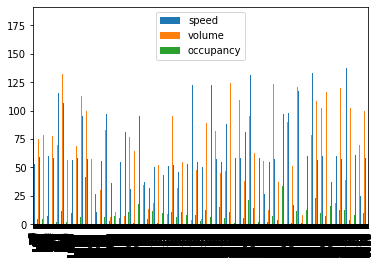

In [131]:
# kind='bar'是柱形图，默认为line
data_for_plot.plot(kind='bar')
plt.show()

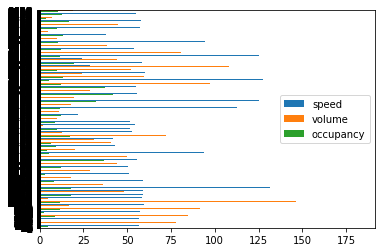

In [132]:
# 横柱形图
data_for_plot.plot(kind='barh')

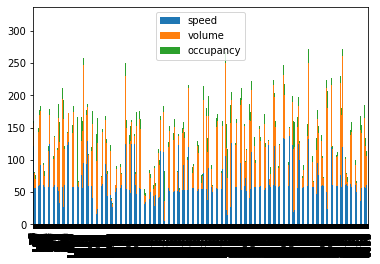

In [133]:
# stacked=True堆叠
data_for_plot.plot(kind='bar',stacked=True)
plt.show()

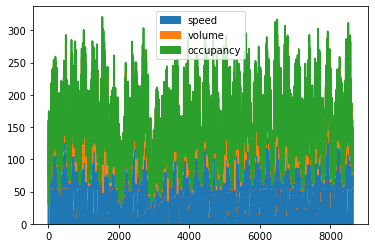

In [134]:
#曲线覆盖面积图
data_for_plot.plot(kind='area')
plt.show()

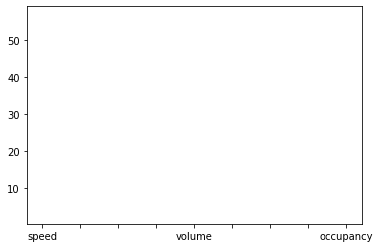

In [5]:
# 画一行
data_for_plot.iloc[10].plot()
plt.show()

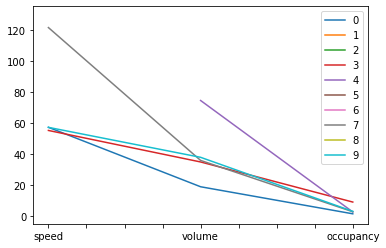

In [7]:
# 画10行
for i in range(10):
# for i in data.index:
    data_for_plot.iloc[i].plot(label=str(i))
plt.legend()
plt.show()

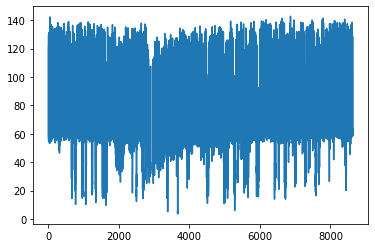

In [137]:
# 画一列
data_for_plot['speed'].plot()
plt.show()

In [140]:
# 转置画行
data_for_plot.T.plot()
plt.show()

ValueError: Image size of 386x129547 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

# 异常值去除

In [81]:
#先进行方差检验，若为零则进行阈值检验，若不为零则进行组合检验，然后进行方差检验
# #以最大值的百分之九十五为界限
# data.max() #最值、累加
# data['speed'].max()
# threshold_speed = data['speed'].max() * 0.95
# data.loc[data['speed'] >= threshold_speed]
from pandas import Series
s= pd.Series()
print(s,s.dtype)
for outliercount in range(2 , data.shape[0]):
#     print(outliercount)
#     tmp = data.loc[outliercount,["speed"]].values.astype(float) - data.loc[outliercount - 1,["speed"]].values.astype(float)
#     print(tmp,tmp.dtype)
    if ( (data.loc[outliercount,["speed"]].values.astype(float) - data.loc[outliercount-1,["speed"]].values.astype(float))**2 ==0 and 
        (data.loc[outliercount,["volume"]].values.astype(float) - data.loc[outliercount-1,["volume"]].values.astype(float))**2 ==0 and 
        (data.loc[outliercount,["occupancy"]].values.astype(float) - data.loc[outliercount-1,["occupancy"]].values.astype(float))**2 ==0) :
        #阈值检测设置速度：0-140；流量：0-225；占用率：0-100；
        if (0<= data.loc[outliercount,["speed"]].values <= 140) & (0<= data.loc[outliercount,["volume"]].values <= 225) & (0<= data.loc[outliercount,["occupancy"]].values <= 100) :#阈值检验
            pass
#             print("阈值检测通过") #阈值检测通过
        else : 
            s= s.append(Series([outliercount]))#添加该行标记到series，之后删除该行数据
            print("添加行", outliercount)
    elif ((data.loc[outliercount,["speed"]].values ==0 and data.loc[outliercount,["volume"]].values ==0 and data.loc[outliercount,["occupancy"]].values !=0) or 
            (data.loc[outliercount,["speed"]].values ==0 and data.loc[outliercount,["volume"]].values !=0 and data.loc[outliercount,["occupancy"]].values ==0) or 
            (data.loc[outliercount,["speed"]].values !=0 and data.loc[outliercount,["volume"]].values ==0 and data.loc[outliercount,["occupancy"]].values ==0) or 
            (data.loc[outliercount,["speed"]].values !=0 and data.loc[outliercount,["volume"]].values !=0 and data.loc[outliercount,["occupancy"]].values ==0) or 
            (data.loc[outliercount,["speed"]].values ==0 and data.loc[outliercount,["volume"]].values !=0 and data.loc[outliercount,["occupancy"]].values !=0)) :
        s= s.append(Series([outliercount])) #加该行标记到series，之后删除该行数据
        print("添加行", outliercount)
    else :
        #组合检验+阈值检验
        #组合检验（注意量纲）：（速度*1000/60）*（占用率*5）/（流量*5）=结果，结果：0-2038
        Combination_testing = (data.loc[outliercount,["speed"]].values*1000/60)*(data.loc[outliercount,["occupancy"]].values*5)/(data.loc[outliercount,["volume"]].values*5)
        if (0<= Combination_testing <=2038) :
            pass
#             print("组合检验通过") #组合检验通过
        else :
            s= s.append(Series([outliercount])) #添加该行标记到series，之后删除该行数据
        if (0<= data.loc[outliercount,["speed"]].values <= 140) & (0<= data.loc[outliercount,["volume"]].values <= 225) & (0<= data.loc[outliercount,["occupancy"]].values <= 100) :#阈值检验
            pass
#             print("阈值检测通过") #阈值检测通过
        else : 
            s= s.append(Series([outliercount])) #添加该行标记到series，之后删除该行数据
            print("添加行", outliercount)
s = s.astype('int')
s = s.sort_values(ascending=False)        
print(s)        
#删除对应列数据
print(data.shape[0])
data.drop(s,inplace=True) #根据S的编号删除
print(data.shape[0])

Series([], dtype: float64) float64
添加行 2


C:\ProgramData\Anaconda3\envs\mathematical_modeling\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
C:\ProgramData\Anaconda3\envs\mathematical_modeling\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in greater_equal
C:\ProgramData\Anaconda3\envs\mathematical_modeling\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater_equal


添加行 39


C:\ProgramData\Anaconda3\envs\mathematical_modeling\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in double_scalars
C:\ProgramData\Anaconda3\envs\mathematical_modeling\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in true_divide


添加行 1142
添加行 1144
添加行 2054
添加行 2079
添加行 2857
添加行 2906
添加行 2907
添加行 2911
添加行 2914
添加行 2918
添加行 2921
添加行 2924
添加行 2925
添加行 2926
添加行 2927
添加行 2928
添加行 2929
添加行 2930
添加行 2931
添加行 2932
添加行 2933
添加行 2934
添加行 2936
添加行 2937
添加行 2938
添加行 2939
添加行 2940
添加行 2941
添加行 2942
添加行 2946
添加行 2947
添加行 2948
添加行 2952
添加行 2954
添加行 2955
添加行 2958
添加行 2959
添加行 2962
添加行 2965
添加行 2980
添加行 2981
添加行 2982
添加行 2983
添加行 2984
添加行 2985
添加行 2986
添加行 2987
添加行 2988
添加行 2989
添加行 2990
添加行 3014
添加行 3015
添加行 3016
添加行 3194
添加行 5198
添加行 6066
添加行 6176
添加行 6626
添加行 6867
添加行 6962
添加行 7481
添加行 7769
添加行 7792
添加行 8404
0    8404
0    8373
0    8003
0    7792
0    7792
0    7772
0    7769
0    7481
0    7211
0    6962
0    6943
0    6902
0    6867
0    6626
0    6176
0    6066
0    5198
0    4769
0    4621
0    4064
0    3194
0    3193
0    3192
0    3016
0    3015
0    3014
0    2992
0    2991
0    2990
0    2989
0    2988
0    2987
0    2986
0    2985
0    2984
0    2983
0    2982
0    2981
0    2980
0    2965
0    2964
0    2962
0   

# 保存数据

In [82]:
data.to_csv('data 1_change.csv')      #写入csv文件

In [73]:
print(data.shape[0])
data.drop(s,inplace=True)
# for i in range(s.shape[0]):
#     print(s[])
#     data.drop()

print(data.shape[0])

8635
8522


# 是否显示全部print数据

In [59]:
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50

print(s,s.dtype)

0    8404
0    8373
0    8003
0    7792
0    7792
0    7772
0    7769
0    7481
0    7211
0    6962
0    6943
0    6902
0    6867
0    6626
0    6176
0    6066
0    5198
0    4769
0    4621
0    4064
0    3194
0    3193
0    3192
0    3016
0    3015
0    3014
0    2992
0    2991
0    2990
0    2989
0    2988
0    2987
0    2986
0    2985
0    2984
0    2983
0    2982
0    2981
0    2980
0    2965
0    2964
0    2962
0    2961
0    2959
0    2958
0    2956
0    2955
0    2954
0    2952
0    2951
0    2950
0    2949
0    2948
0    2947
0    2946
0    2945
0    2944
0    2943
0    2942
0    2941
0    2940
0    2939
0    2938
0    2937
0    2936
0    2935
0    2934
0    2933
0    2932
0    2931
0    2930
0    2929
0    2928
0    2927
0    2926
0    2925
0    2924
0    2921
0    2920
0    2919
0    2918
0    2917
0    2916
0    2915
0    2914
0    2913
0    2911
0    2908
0    2907
0    2906
0    2905
0    2904
0    2857
0    2613
0    2350
0    2331
0    2126
0    2079
0    2054
0    2053


In [45]:
speedtmp = data.loc[9,["speed"]]
print(speedtmp)

speed    121.740294
Name: 9, dtype: object


In [2]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output


n = 10
a = np.zeros((n, n))
plt.figure()

for i in range(n):
    plt.imshow(a)
    plt.show()
    a[i, i] = 1
    clear_output(wait=True)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [4]:
%matplotlib inline
%matplotlib widget
import matplotlib.pyplot as plt
plt.figure()
x = [1,2,3]
y = [4,5,6]
plt.plot(x,y)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [1]:
import sys
sys.path   #查看导入包的路径
sys.executable  #查看使用kernel的路径


'C:\\ProgramData\\Anaconda3\\envs\\mathematical_modeling\\python.exe'